# **Crop classification by Coconuts**

In the hackathon, we have 3 mains approach.


1.   Relevent indexs using Classical Machine Learning
2.   Image from each band using Deep Learning



## 1 Classical Maching Learning

From [a paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9564343), there are 3 indexs used for crop classification whcih: NDVI, NDWI and EVI.


1.   **NDVI**
* NDVI = -1 to 0 represent Water bodies
* NDVI = -0.1 to 0.1 represent Barren rocks, sand, or snow
* NDVI = 0.2 to 0.5 represent Shrubs and grasslands or senescing crops
* NDVI = 0.6 to 1.0 represent Dense vegetation or tropical rainforest
2.   **NDWI**
3.   **EVI**
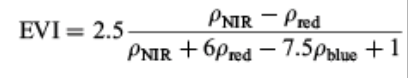



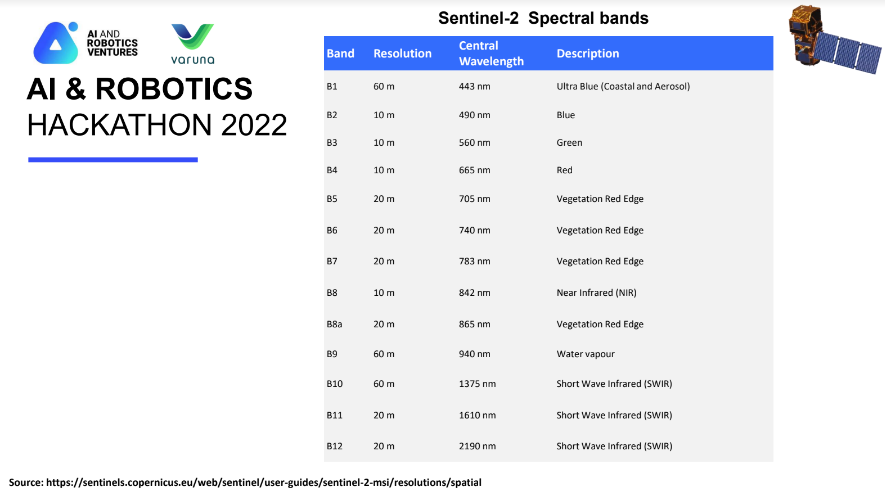

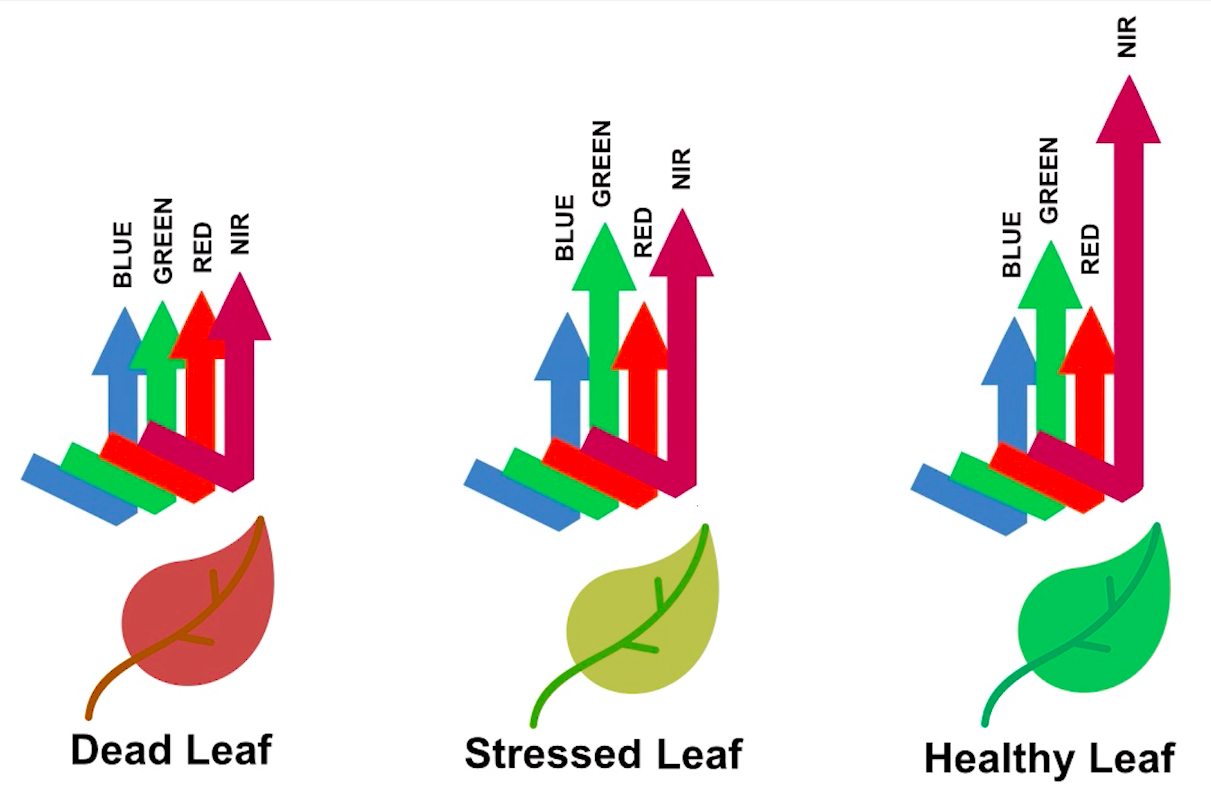

In [ ]:
!pip -q install geopandas
!pip -q install rasterio

!pip -q install -U scikit-learn
!pip -q install bottleneck
!pip -q install pycaret

     |████████████████████████████████| 24.8 MB 1.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.2 which is incompatible.


In [ ]:
import rasterio
from tqdm.auto import tqdm
from rasterio import plot
from pathlib import Path
import matplotlib.pyplot as plt  
import geopandas as gpd
import pycaret
import glob
import os
import numpy as np
import pandas as pd
import pickle as pkl
from pycaret.utils import enable_colab
enable_colab()
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
%matplotlib inline
from rasterio.mask import mask

Colab mode enabled.


In [ ]:
root_data_path = Path('/content/drive/MyDrive/Varuna Hackathon 2022')
train          = root_data_path.joinpath("training_area/traindata.shp")
gpd_train      = gpd.read_file(train.as_posix())

In [ ]:
time_series_sample = []
sample = []

for path in tqdm(list(root_our_data.joinpath('2021').glob("**/*B04.jp2"))):

  # if path.as_posix().split("_")[5].split(".")[0] in ["B04"]:
  #   print(path)
  
    with rasterio.open(path.as_posix()) as src:
        for i in range(0,1316):
          out_image, transformed = mask(src, shapefile['geometry'][i:i+1], crop=True, filled=True)
          out_profile = src.profile.copy()
          label = int(shapefile['crop_type'][i:i+1])
          x = padding(out_image[0], 80, 80)
          sample.append([x,label])
        
    time_series_sample.append(sample)
    sample=[]


In [ ]:
!pip -q install geopandas
!pip -q install rasterio

!pip -q install -U scikit-learn
!pip -q install bottleneck
!pip -q install pycaret

     |████████████████████████████████| 1.0 MB 7.1 MB/s 
     |████████████████████████████████| 16.7 MB 394 kB/s 
     |████████████████████████████████| 6.3 MB 49.8 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 332 kB 8.4 MB/s 
     |████████████████████████████████| 320 kB 7.1 MB/s 
     |████████████████████████████████| 10.4 MB 47.7 MB/s 
     |████████████████████████████████| 2.0 MB 40.5 MB/s 
     |████████████████████████████████| 262 kB 35.3 MB/s 
     |████████████████████████████████| 1.7 MB 50.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 120 kB 52.1 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 17.8 MB 596 kB/s 
     |████████████████████████████████| 6.8 MB 39.2 MB/s 
     |█████████████████

In [ ]:
import rasterio
from tqdm.auto import tqdm
from rasterio import plot
from pathlib import Path
import matplotlib.pyplot as plt  
import geopandas as gpd
import pycaret
import glob
import os
import numpy as np
import pandas as pd
import pickle as pkl
from pycaret.utils import enable_colab
enable_colab()
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
%matplotlib inline
from rasterio.mask import mask

Colab mode enabled.


## **1. Data Preprocess**

Our main obstrucle is cloud that covers crop area. It affects the model when input data is contaminated by unrelate white color of the cloud. Therefore, we come up with an approach by assuming that Sentinel receive lower value of Band2,3,4,8 from the area cover by cloud.

In [ ]:
path = '/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/'
date_list = os.listdir(path)
date_list.sort()
date_list

['20210101',
 '20210106',
 '20210111',
 '20210116',
 '20210121',
 '20210126',
 '20210205',
 '20210210',
 '20210215',
 '20210220',
 '20210225',
 '20210302',
 '20210307',
 '20210312',
 '20210317',
 '20210322',
 '20210327',
 '20210401',
 '20210406',
 '20210411',
 '20210416',
 '20210421',
 '20210426',
 '20210501',
 '20210506',
 '20210511',
 '20210516',
 '20210521',
 '20210526',
 '20210531',
 '20210605',
 '20210610',
 '20210615',
 '20210620',
 '20210625',
 '20210630',
 '20210705',
 '20210710',
 '20210715',
 '20210720',
 '20210725',
 '20210730',
 '20210804',
 '20210809',
 '20210814',
 '20210819',
 '20210824',
 '20210829',
 '20210903',
 '20210908',
 '20210913',
 '20210918',
 '20210923',
 '20210928',
 '20211003',
 '20211008',
 '20211013',
 '20211018',
 '20211023',
 '20211028',
 '20211102',
 '20211107',
 '20211117',
 '20211122',
 '20211127',
 '20211202',
 '20211207',
 '20211212',
 '20211217',
 '20211222',
 '20211227']

### **Band 2**

In [ ]:
for date in date_list:
  print(date[4:6])

01
01
01
01
01
01
02
02
02
02
02
03
03
03
03
03
03
04
04
04
04
04
04
05
05
05
05
05
05
05
06
06
06
06
06
06
07
07
07
07
07
07
08
08
08
08
08
08
09
09
09
09
09
09
10
10
10
10
10
10
11
11
11
11
11
12
12
12
12
12
12


In [ ]:
path_2_dict = {}
path_2_dict['01'] = []
path_2_dict['02'] = []
path_2_dict['03'] = []
path_2_dict['04'] = []
path_2_dict['05'] = []
path_2_dict['06'] = []
path_2_dict['07'] = []
path_2_dict['08'] = []
path_2_dict['09'] = []
path_2_dict['10'] = []
path_2_dict['11'] = []
path_2_dict['12'] = []

for date in date_list:
  folder_path = '/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/'+date+'/IMG_DATA/47PQS_'+date+'_B02.jp2'
  path_2_dict[date[4:6]].append(folder_path)





In [ ]:
path_scl_dict = {}
path_scl_dict['01'] = []
path_scl_dict['02'] = []
path_scl_dict['03'] = []
path_scl_dict['04'] = []
path_scl_dict['05'] = []
path_scl_dict['06'] = []
path_scl_dict['07'] = []
path_scl_dict['08'] = []
path_scl_dict['09'] = []
path_scl_dict['10'] = []
path_scl_dict['11'] = []
path_scl_dict['12'] = []

for date in date_list:
  folder_path = '/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/'+date+'/IMG_DATA/47PQS_'+date+'_SCL.jp2'
  path_scl_dict[date[4:6]].append(folder_path)

In [ ]:
path_2_dict['12']

['/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/20211202/IMG_DATA/47PQS_20211202_B02.jp2',
 '/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/20211207/IMG_DATA/47PQS_20211207_B02.jp2',
 '/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/20211212/IMG_DATA/47PQS_20211212_B02.jp2',
 '/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/20211217/IMG_DATA/47PQS_20211217_B02.jp2',
 '/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/20211222/IMG_DATA/47PQS_20211222_B02.jp2',
 '/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/20211227/IMG_DATA/47PQS_20211227_B02.jp2']

In [ ]:
import scipy

In [ ]:
band2 = {}

for i in path_2_dict:
  band2[i] = np.zeros((2051,2051))
  for j in path_2_dict[i]:
    for k in path_scl_dict[i]:
      scl = rasterio.open(k,driver="JP2OpenJPEG")
      b2 = rasterio.open(j,driver="JP2OpenJPEG")
      scl_np = scl.read(1).astype('float64')
      b2_np  = b2.read(1).astype('float64')
      scl_np  = np.resize(scipy.ndimage.zoom(scl_np, 2, order=0),(2051,2051))
      print(scl_np)
      not_cloud = np.where(np.logical_or(scl_np==5,scl_np==4),b2_np,0)
      band2[i]  = np.where(not_cloud>band2[i] , not_cloud , band2[i] )

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

#### Save file

In [ ]:
raster_2_1=rasterio.open('/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/20211202/IMG_DATA/47PQS_20211202_B02.jp2')
preprocessed_202101 = rasterio.open('/content/drive/MyDrive/2022_ARV_Coconuts/2021_preprocessed/202101_B2.tiff','w',driver='Gtiff',
                          width=2051, 
                          height = 2051, 
                          count=1, crs=raster_2_1.crs, 
                          transform=raster_2_1.transform, 
                          dtype='float64')
preprocessed_202101.write(band2['01'],1)
preprocessed_202101.close()

In [ ]:
raster_2_2=rasterio.open('/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/20210205/IMG_DATA/47PQS_20210205_B02.jp2')
preprocessed_202102 = rasterio.open('/content/drive/MyDrive/2022_ARV_Coconuts/2021_preprocessed/202102_B2.tiff','w',driver='Gtiff',
                          width=2051, 
                          height = 2051, 
                          count=1, crs=raster_2_2.crs, 
                          transform=raster_2_2.transform, 
                          dtype='float64')
preprocessed_202102.write(band2['02'],1)
preprocessed_202102.close()

No handles with labels found to put in legend.


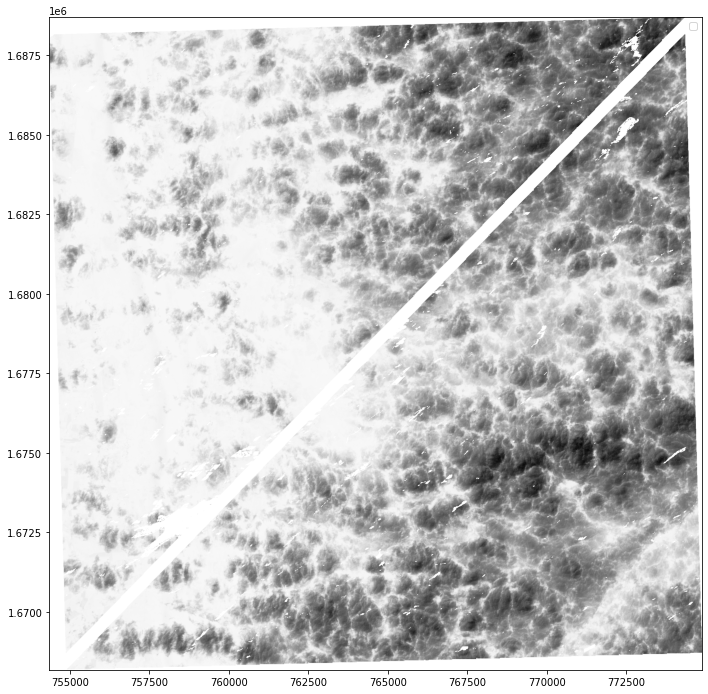

In [ ]:
ndvi = rasterio.open('/content/drive/MyDrive/2022_ARV_Coconuts/2021_preprocessed/202102_B2.tiff')
fig = plt.figure(figsize=(18,12))
plt.legend()
plot.show(ndvi,cmap='Greys')

In [ ]:
raster_2_7=rasterio.open('/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/20210710/IMG_DATA/47PQS_20210710_B02.jp2')
preprocessed_202107 = rasterio.open('/content/drive/MyDrive/2022_ARV_Coconuts/2021_preprocessed/202107_B2.tiff','w',driver='Gtiff',
                          width=2051, 
                          height = 2051, 
                          count=1, crs=raster_2_7.crs, 
                          transform=raster_2_7.transform, 
                          dtype='float64')
preprocessed_202107.write(band2['07'],1)
preprocessed_202107.close()


No handles with labels found to put in legend.


[[577. 555. 554. ... 504. 448. 434.]
 [583. 572. 566. ... 477. 449. 431.]
 [633. 586. 582. ... 457. 442. 463.]
 ...
 [807. 908. 971. ... 511. 465. 465.]
 [751. 797. 801. ... 505. 503. 482.]
 [622. 722. 679. ... 487. 536. 483.]]


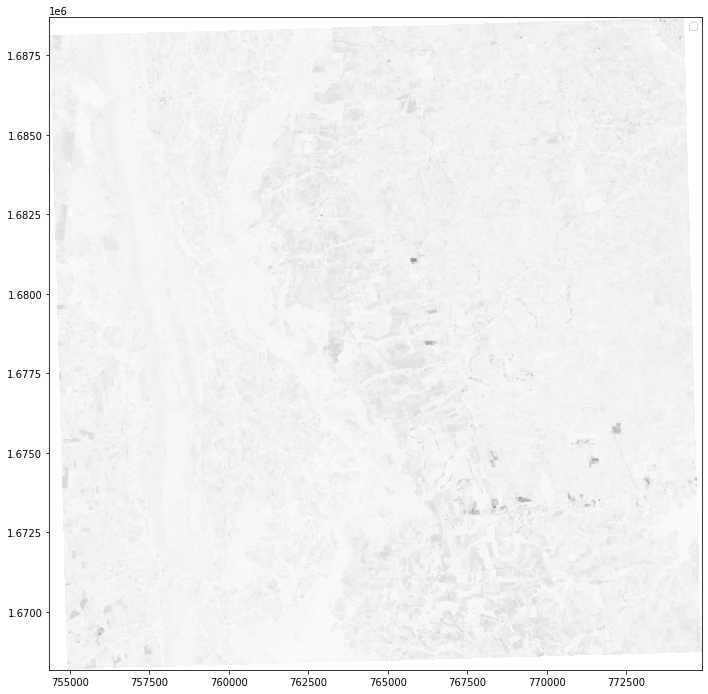

In [ ]:
ndvi = rasterio.open('/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/20210205/IMG_DATA/47PQS_20210205_B02.jp2',driver="JP2OpenJPEG")
fig = plt.figure(figsize=(18,12))
plt.legend()
pic7 = ndvi.read(1).astype('float64')
print(pic7[100:200,100:200])
plot.show(ndvi,cmap='Greys')



In [ ]:
pic7 = ndvi.read(1).astype('float64')
pic7

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
ndvi = rasterio.open('/content/drive/MyDrive/2022_ARV_Coconuts/2021_preprocessed/202101_B2.tiff')
fig = plt.figure(figsize=(18,12))
plt.legend()
plot.show(ndvi,cmap='Greys')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


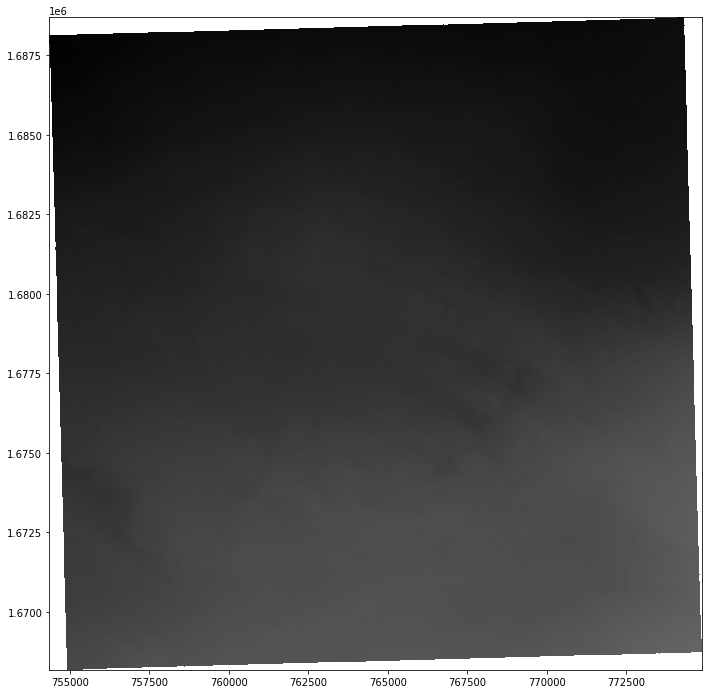

In [ ]:
scl5 = rasterio.open('/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/20210506/IMG_DATA/47PQS_20210506_SCL.jp2',driver="JP2OpenJPEG")
b25 = rasterio.open('/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/20210506/IMG_DATA/47PQS_20210506_B02.jp2',driver="JP2OpenJPEG")
scl_np = scl.read(1).astype('float64')
b2_np  = b2.read(1).astype('float64')
scl_np  = np.resize(scipy.ndimage.zoom(scl_np, 2, order=0),(2051,2051))
print(scl_np)
fig = plt.figure(figsize=(18,12))
plot.show(b25,cmap='Greys')

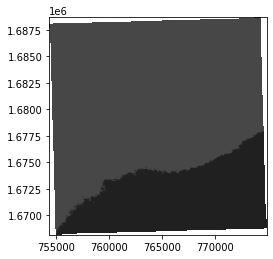

In [ ]:
plot.show(scl5,cmap='Greys')

In [ ]:
scl5

<open DatasetReader name='/content/drive/MyDrive/Varuna Hackathon 2022/sentinel-2-image/2021/20210506/IMG_DATA/47PQS_20210506_SCL.jp2' mode='r'>